In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('dark_background')

In [2]:
def crear(gender):
    names=[]
    df=pd.read_csv(f'{gender}_names.csv').dropna()
    df.sort_values('frequency',ascending=False,inplace=True)
    for x in df.name:
        if(('Ç'in x)or("'"in x)):
            pass
        else:
            nombres=x.split(' ')
            for n in nombres:
                names.append(n)
                
    names=list(set(names))
    return names

In [3]:
female=crear('female')
male=crear('male')

In [5]:
distinct=[]
for lista in [female, male]:
    for n in lista:
        for char in n:
            if char not in distinct:
                distinct.append(char)

In [8]:
distinct=sorted(distinct)

In [49]:
char2ix={c:i for i,c in enumerate(distinct)}
ix2char={i:c for i,c in enumerate(distinct)}

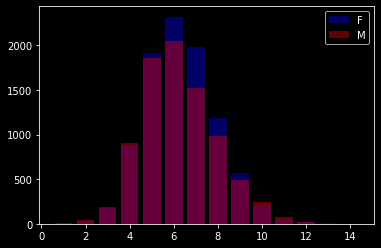

In [27]:
for lista,color,name in zip([female, male],['blue','red'],['F','M']):
    x,y=np.unique([len(name) for name in lista], return_counts=True)
    plt.bar(x,y,color=color,label=name,alpha=0.4)
plt.legend()

In [50]:
data=[]
for i,lista in enumerate([female, male]):
    for name in lista:
        encoding=[char2ix[c] for c in name]
        x=np.zeros((1,14, 27),dtype='float32')
        for n, ix in enumerate(encoding):
            x[0,n,ix]=1
        data.append((x,i))

In [58]:
random.seed(9)
random.shuffle(data)

In [62]:
X=[]
Y=[]
for x, y in data:
    X.append(x)
    Y.append(y)

In [64]:
X=np.array(X)

In [66]:
X=X.reshape(-1,14,27)

In [71]:
Y=np.array(Y)

In [73]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [74]:
from tensorflow.keras.layers import LSTM, Dense, Input, Masking
from tensorflow.keras.models import Model

In [99]:
masking=Masking(mask_value=0.,input_shape=(14,27))
lstm=LSTM(64, return_sequences=False)
densor=Dense(1, activation='sigmoid')

In [100]:
class miRNN:
    def forward(self, inputs):
        x = masking(inputs)
        x = lstm(x)
        x = Dense(32)(x)
        x = densor(x)
        return x
    
    def give_model(self):
        inputs = Input(shape=(14,27))
        outputs = self.forward(inputs)
        
        model = Model(inputs=inputs, outputs=outputs)
        
        return model

In [101]:
model = miRNN().give_model()

In [102]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 14, 27)]          0         
_________________________________________________________________
masking_3 (Masking)          (None, 14, 27)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                23552     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 25,665
Trainable params: 25,665
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.fit(X,Y,batch_size=64,epochs=35)

Epoch 1/35
277/277 [==============================] - 1s 4ms/step - loss: 0.5260 - accuracy: 0.7355
Epoch 2/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4672 - accuracy: 0.7783
Epoch 3/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4592 - accuracy: 0.7805
Epoch 4/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4503 - accuracy: 0.7859
Epoch 5/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.7901
Epoch 6/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4351 - accuracy: 0.7945
Epoch 7/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.7992
Epoch 8/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4173 - accuracy: 0.8059
Epoch 9/35
277/277 [==============================] - 1s 4ms/step - loss: 0.4069 - accuracy: 0.8117
Epoch 10/35
277/277 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.8171

In [127]:
def classify(name):
    letras=len(name)
    X=np.zeros((1,letras,27),dtype='float32')
    indices=[char2ix[char] for char in name]
    for n,ix in enumerate(indices):
        X[0,n,ix]=1
    
    pred=model.predict(X)
    if pred > 0.5:
        return('Hombre')
    return('Mujer')

In [194]:
classify('LUISA')

'Mujer'